In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import ast
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

### Read the Dataset (Sentence Transformer embeddings)

In [3]:
#dataset = pd.read_csv('test_papers_sent_transf.csv')

#dataset['sentence_embeddings'] = dataset['sentence_embeddings'].apply(ast.literal_eval)
#dataset['sentences'] = dataset['sentences'].apply(ast.literal_eval)
#dataset['keywords'] = dataset['keywords'].apply(ast.literal_eval)
#dataset['sections'] = dataset['sections'].apply(ast.literal_eval)

dataset = pd.read_csv('../data/test_sentence_embeddings.csv')
print(dataset.shape)

dataset['doc2vec_emb'] = dataset['doc2vec_emb'].apply(ast.literal_eval)
dataset['sent_transf_emb'] = dataset['sent_transf_emb'].apply(ast.literal_eval)
dataset['word2vec_emb'] = dataset['word2vec_emb'].apply(ast.literal_eval)

(4008, 10)


In [4]:
dataset.head(3)

,paper_id,section,sentence,category,tag,categ_id,doc2vec_emb,sent_transf_emb,word2vec_emb
0,paper_1,abstract,"Through Social media, people are able to write...",Artificial Intelligence,paper_1_abstract_0,0,"[-1.3085605, -0.20237897, -0.5046985, -0.68862...","[0.9923173, 0.08931459, -0.34090334, -0.693805...","[0.25343436, 0.012410109, -0.34438372, 0.30190..."
1,paper_1,abstract,Through these messages also called status upda...,Artificial Intelligence,paper_1_abstract_1,0,"[0.81807953, 1.3646916, -0.16340378, -0.101500...","[0.63820654, 0.23517299, 0.16850387, -0.431451...","[0.11073734, 0.06362086, -0.29996228, 0.133115..."
2,paper_1,abstract,Tweets and other updates have become so import...,Artificial Intelligence,paper_1_abstract_2,0,"[0.38645154, 0.12783079, 0.8540295, 1.2094133,...","[0.35303938, -0.19263175, 0.4756388, 0.1927203...","[0.21838884, -0.055159472, -0.29618284, -0.001..."


### Clustering for one paper (Silhouette coefficient)

In [10]:
from tqdm import tqdm
sil_scores = []
#X = np.array(dataset.sentence_embeddings.iloc[0])
X = np.array(list(dataset[dataset.paper_id == 'paper_1'].word2vec_emb.values))
#print(X)

for i in tqdm(range(2, len(X)//3)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X)

    sil_scores.append(silhouette_score(X, pred_y))

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:03<00:00,  6.85it/s]


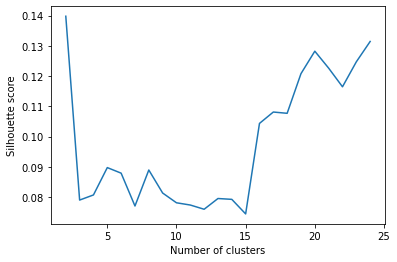

In [16]:
plt.plot(np.arange(2, len(X)//3), sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

In [12]:
n_cluster_best = np.arange(2, len(X)//3)[np.argmax(sil_scores)]

sil_scores[np.argmax(sil_scores)], n_cluster_best

(0.1397832832603845, 2)

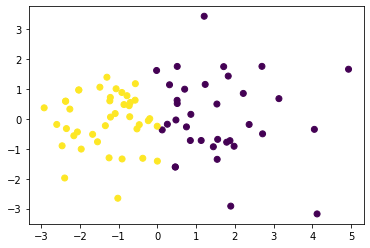

In [14]:
X = np.array(list(dataset[dataset.paper_id == 'paper_1'].word2vec_emb.values))

kmeans = KMeans(n_clusters=n_cluster_best, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
pca_emb = pca.fit_transform(np.vstack([X, centers]))

plt.scatter(pca_emb[:-len(centers)][:, 0], pca_emb[:-len(centers)][:, 1], c = pred_y)

In [8]:
predictions_df = pd.DataFrame({'sentence': dataset.sentences.iloc[0], 'embedding': dataset.sentence_embeddings.iloc[0],
                              'cluster': pred_y})

In [9]:
predictions_df

,sentence,embedding,cluster
0,"Through Social media, people are able to write...","[0.992317319, 0.0893145874, -0.340903342, -0.6...",8
1,Through these messages also called status upda...,"[0.638206542, 0.235172987, 0.168503866, -0.431...",8
2,Tweets and other updates have become so import...,"[0.353039384, -0.192631751, 0.475638807, 0.192...",1
3,They enable interaction among vast groups of p...,"[0.4415043, 0.514402509, 0.595647573, -0.66265...",1
4,These numerous amounts of information can be e...,"[-0.456641614, 0.140941769, -0.427793831, 0.77...",1
5,This paper reports on the successful developme...,"[-0.0771378428, 0.0910160542, -0.0700893104, -...",1
6,This helps in solving the problem of losing vi...,"[-0.387291878, 0.0890794843, -0.184452757, -0....",5
7,It addresses this limitation by using the data...,"[-0.366141051, 0.33386907, -0.0831496716, -0.4...",12
8,Clustering is a descriptive task of data mining.,"[-0.517471611, 0.1818095, -0.317586124, -0.210...",12
9,A cluster is a collection of data objects that...,"[-0.266278833, 0.0669859499, 0.67213738, -0.42...",13


In [10]:
predictions_df['distance_from_center'] = predictions_df.apply(lambda row: 
                                              euclidean_distances([row['embedding']], [centers[row['cluster']]]).item(), 
                                              axis = 1)

In [11]:
predictions_df.head()

,sentence,embedding,cluster,distance_from_center
0,"Through Social media, people are able to write...","[0.992317319, 0.0893145874, -0.340903342, -0.6...",8,9.248090
1,Through these messages also called status upda...,"[0.638206542, 0.235172987, 0.168503866, -0.431...",8,10.225120
2,Tweets and other updates have become so import...,"[0.353039384, -0.192631751, 0.475638807, 0.192...",1,10.100835
3,They enable interaction among vast groups of p...,"[0.4415043, 0.514402509, 0.595647573, -0.66265...",1,11.137280
4,These numerous amounts of information can be e...,"[-0.456641614, 0.140941769, -0.427793831, 0.77...",1,9.584319


In [12]:
summary_len = np.ceil(len(X)/3)
sent_per_cluster = np.ceil(summary_len / n_cluster_best)

summary_len, sent_per_cluster

(26.0, 2.0)

In [13]:
predictions_df.sort_values(['distance_from_center']).iloc[:int(summary_len)].sort_index().sentence.values

array(['Clustering is the concept that was used in this research to create groups from social media data which can be used for learning on electronic learning platforms.',
       'The system design methodology used was incremental prototyping.',
       'In incremental prototyping, the whole requirements are broken down into building blocks which are incremented each time a new component is integrated based on an overall design solution.',
       'Requirements and Architectural Design can be done up front and then each prototype developed as the project progresses.',
       'The second task involved identifying the right kind of data to use for training the expected prototype as well as testing it.',
       'The third step involved using the data already preprocessed above to train the prototype.',
       'The relationship between the data items can be established using the k-nearest neighbor technique.',
       'The illustration of the proposed prototype is given below.',
       'The r

In [18]:
predictions_df.sort_values(['cluster', 'distance_from_center']).groupby('cluster').head(sent_per_cluster).sort_index().sentence.values

array(['A cluster is a collection of data objects that are either similar to one another in the same group or dissimilar to objects in other groups.',
       'Some of them include summarization, compression and k-nearest neighbor which localizes search to one or a small number of clusters.',
       'Clustering is the concept that was used in this research to create groups from social media data which can be used for learning on electronic learning platforms.',
       'The system design methodology used was incremental prototyping.',
       'In incremental prototyping, the whole requirements are broken down into building blocks which are incremented each time a new component is integrated based on an overall design solution.',
       'The second task involved identifying the right kind of data to use for training the expected prototype as well as testing it.',
       'The third step involved using the data already preprocessed above to train the prototype.',
       'The relationship bet

In [20]:
predictions_df.sort_values(['distance_from_center']).iloc[:int(summary_len)]

,sentence,embedding,cluster,distance_from_center
73,The techniques that are currently used in grou...,"[0.0205889735, 0.273136735, -0.740502298, 0.80...",4,0.000000
32,The relationship between the data items can be...,"[-0.732811987, 0.0533921979, 0.193581447, 0.33...",6,0.000000
61,The techniques that are currently used in grou...,"[0.0205889735, 0.273136735, -0.740502298, 0.80...",4,0.000000
62,They therefore come with a lot of challenges i...,"[0.112372965, -0.511598706, 0.141845405, -0.28...",9,4.840985
74,They therefore come with a lot of challenges i...,"[0.112372965, -0.511598706, 0.141845405, -0.28...",9,4.840985
21,"In incremental prototyping, the whole requirem...","[0.0511142686, 0.117713466, 0.902520657, -0.61...",10,4.913414
52,A total of 200 tweets were extracted and used ...,"[0.9802738, -0.52335197, 0.38817635, 1.5159482...",7,5.703469
54,The results below illustrate a summary of what...,"[0.756235301, -0.392186612, 0.312777966, 0.924...",7,5.703469
68,The system was therefore able to address the l...,"[-0.399093211, 0.180294111, -0.424466699, -0.0...",5,6.538780
60,"Through the study, it can be underscored that ...","[0.0642684326, -0.272983581, -0.71656394, 0.23...",5,6.762603


### Clustering for all Papers

In [5]:
def cluster_single_paper(paper_id, embedding_col, top_n = True):
    paper_df = dataset[dataset.paper_id == paper_id]
    
    sil_scores = []
    X = np.array(list(map(list, dataset[dataset.paper_id == paper_id][embedding_col].values)))

    for i in range(2, len(X)//3):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        pred_y = kmeans.fit_predict(X)

        sil_scores.append(silhouette_score(X, pred_y))
        
    n_cluster_best = np.arange(2, len(X)//3)[np.argmax(sil_scores)]
    
    print('Best Sihouette score:  ', sil_scores[np.argmax(sil_scores)])
    print('Optimal num. of cluster:', n_cluster_best)
    
    kmeans = KMeans(n_clusters=n_cluster_best, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_
    
    predictions_df = pd.DataFrame({'sentence': paper_df['sentence'], 'embedding': paper_df[embedding_col],
                              'cluster': pred_y})
    
    predictions_df['distance_from_center'] = predictions_df.apply(lambda row: 
                                              euclidean_distances([row['embedding']], [centers[row['cluster']]]).item(), 
                                              axis = 1)
    
    summary_len = np.ceil(len(X)/3)
    print('Summary length:', summary_len)
    
    if top_n:
        summary = predictions_df.sort_values(['distance_from_center']).iloc[:int(summary_len)].sort_index().sentence.values
    else:
        sent_per_cluster = np.ceil(summary_len / n_cluster_best)
        summary = predictions_df.sort_values(['cluster', 
                                'distance_from_center']).groupby('cluster').head(sent_per_cluster).sort_index().sentence.values
    return summary

## Doc2vec

In [10]:
for paper_id in dataset.drop_duplicates('paper_id')['paper_id'].values:
    print(f'Processing {paper_id}...')
    summary_sentences = cluster_single_paper(paper_id, 'doc2vec_emb')
    
    summary_text = ' '.join(summary_sentences)

    with open('../results/clust_summaries_doc2vec_top_n.txt', 'a+', encoding = 'utf-8') as f:
        f.write('\t'.join([paper_id, summary_text]) + '\n')
        
    print('-'*30)

Processing paper_1...
Best Sihouette score:   0.1404972803969205
Optimal num. of cluster: 2
Summary length: 26.0
------------------------------
Processing paper_2...
Best Sihouette score:   0.12573138744679815
Optimal num. of cluster: 17
Summary length: 33.0
------------------------------
Processing paper_3...
Best Sihouette score:   0.26374944603171735
Optimal num. of cluster: 2
Summary length: 68.0
------------------------------
Processing paper_21...
Best Sihouette score:   0.09658273910178453
Optimal num. of cluster: 8
Summary length: 20.0
------------------------------
Processing paper_31...
Best Sihouette score:   0.11246133095434228
Optimal num. of cluster: 3
Summary length: 42.0
------------------------------
Processing paper_38...
Best Sihouette score:   0.12996049564525708
Optimal num. of cluster: 2
Summary length: 61.0
------------------------------
Processing paper_57...
Best Sihouette score:   0.0780656821415637
Optimal num. of cluster: 5
Summary length: 41.0
-------------

In [11]:
for paper_id in dataset.drop_duplicates('paper_id')['paper_id'].values:
    print(f'Processing {paper_id}...')
    summary_sentences = cluster_single_paper(paper_id, 'doc2vec_emb', False)
    
    summary_text = ' '.join(summary_sentences)

    with open('../results/clust_summaries_doc2vec_equal_clusters.txt', 'a+', encoding = 'utf-8') as f:
        f.write('\t'.join([paper_id, summary_text]) + '\n')
        
    print('-'*30)

Processing paper_1...
Best Sihouette score:   0.1404972803969205
Optimal num. of cluster: 2
Summary length: 26.0
------------------------------
Processing paper_2...
Best Sihouette score:   0.12573138744679815
Optimal num. of cluster: 17
Summary length: 33.0
------------------------------
Processing paper_3...
Best Sihouette score:   0.26374944603171735
Optimal num. of cluster: 2
Summary length: 68.0
------------------------------
Processing paper_21...
Best Sihouette score:   0.09658273910178453
Optimal num. of cluster: 8
Summary length: 20.0
------------------------------
Processing paper_31...
Best Sihouette score:   0.11246133095434228
Optimal num. of cluster: 3
Summary length: 42.0
------------------------------
Processing paper_38...
Best Sihouette score:   0.12996049564525708
Optimal num. of cluster: 2
Summary length: 61.0
------------------------------
Processing paper_57...
Best Sihouette score:   0.0780656821415637
Optimal num. of cluster: 5
Summary length: 41.0
-------------

## Sentence Transformer

In [45]:
for paper_id in dataset.drop_duplicates('paper_id')['paper_id'].values:
    print(f'Processing {paper_id}...')
    summary_sentences = cluster_single_paper(paper_id, 'sent_transf_emb')
    
    summary_text = ' '.join(summary_sentences)

    with open('../results/clust_summaries_sent_transf_top_n.txt', 'a+', encoding = 'utf-8') as f:
        f.write('\t'.join([paper_id, summary_text]) + '\n')
        
    print('-'*30)

Processing paper_1...
Best Sihouette score:   0.11177321908335044
Optimal num. of cluster: 16
Summary length: 26.0
------------------------------
Processing paper_2...
Best Sihouette score:   0.09735152017845533
Optimal num. of cluster: 31
Summary length: 33.0
------------------------------
Processing paper_3...
Best Sihouette score:   0.07863602135664496
Optimal num. of cluster: 3
Summary length: 68.0
------------------------------
Processing paper_21...
Best Sihouette score:   0.07782159121292047
Optimal num. of cluster: 17
Summary length: 20.0
------------------------------
Processing paper_31...
Best Sihouette score:   0.06587943720167608
Optimal num. of cluster: 2
Summary length: 42.0
------------------------------
Processing paper_38...
Best Sihouette score:   0.07539947213015825
Optimal num. of cluster: 55
Summary length: 61.0
------------------------------
Processing paper_57...
Best Sihouette score:   0.07543767743883638
Optimal num. of cluster: 38
Summary length: 41.0
-------

In [46]:
for paper_id in dataset.drop_duplicates('paper_id')['paper_id'].values:
    print(f'Processing {paper_id}...')
    summary_sentences = cluster_single_paper(paper_id, 'sent_transf_emb', False)
    
    summary_text = ' '.join(summary_sentences)

    with open('../results/clust_summaries_sent_transf_equal_clusters.txt', 'a+', encoding = 'utf-8') as f:
        f.write('\t'.join([paper_id, summary_text]) + '\n')
        
    print('-'*30)

Processing paper_1...
Best Sihouette score:   0.11177321908335044
Optimal num. of cluster: 16
Summary length: 26.0
------------------------------
Processing paper_2...
Best Sihouette score:   0.09735152017845533
Optimal num. of cluster: 31
Summary length: 33.0
------------------------------
Processing paper_3...
Best Sihouette score:   0.07863602135664496
Optimal num. of cluster: 3
Summary length: 68.0
------------------------------
Processing paper_21...
Best Sihouette score:   0.07782159121292047
Optimal num. of cluster: 17
Summary length: 20.0
------------------------------
Processing paper_31...
Best Sihouette score:   0.06587943720167608
Optimal num. of cluster: 2
Summary length: 42.0
------------------------------
Processing paper_38...
Best Sihouette score:   0.07539947213015825
Optimal num. of cluster: 55
Summary length: 61.0
------------------------------
Processing paper_57...
Best Sihouette score:   0.07543767743883638
Optimal num. of cluster: 38
Summary length: 41.0
-------

## Word2vec

In [47]:
for paper_id in dataset.drop_duplicates('paper_id')['paper_id'].values:
    print(f'Processing {paper_id}...')
    summary_sentences = cluster_single_paper(paper_id, 'word2vec_emb')
    
    summary_text = ' '.join(summary_sentences)

    with open('../results/clust_summaries_word2vec_top_n.txt', 'a+', encoding = 'utf-8') as f:
        f.write('\t'.join([paper_id, summary_text]) + '\n')
        
    print('-'*30)

Processing paper_1...
Best Sihouette score:   0.1397832831450971
Optimal num. of cluster: 2
Summary length: 26.0
------------------------------
Processing paper_2...
Best Sihouette score:   0.09795059609864795
Optimal num. of cluster: 3
Summary length: 33.0
------------------------------
Processing paper_3...
Best Sihouette score:   0.20214150846618606
Optimal num. of cluster: 2
Summary length: 68.0
------------------------------
Processing paper_21...
Best Sihouette score:   0.18296463274967495
Optimal num. of cluster: 2
Summary length: 20.0
------------------------------
Processing paper_31...
Best Sihouette score:   0.13853991873065025
Optimal num. of cluster: 3
Summary length: 42.0
------------------------------
Processing paper_38...
Best Sihouette score:   0.17865592199950533
Optimal num. of cluster: 3
Summary length: 61.0
------------------------------
Processing paper_57...
Best Sihouette score:   0.092740251376654
Optimal num. of cluster: 8
Summary length: 41.0
---------------

In [48]:
for paper_id in dataset.drop_duplicates('paper_id')['paper_id'].values:
    print(f'Processing {paper_id}...')
    summary_sentences = cluster_single_paper(paper_id, 'word2vec_emb', False)
    
    summary_text = ' '.join(summary_sentences)

    with open('../results/clust_summaries_word2vec_equal_clusters.txt', 'a+', encoding = 'utf-8') as f:
        f.write('\t'.join([paper_id, summary_text]) + '\n')
        
    print('-'*30)

Processing paper_1...
Best Sihouette score:   0.1397832831450971
Optimal num. of cluster: 2
Summary length: 26.0
------------------------------
Processing paper_2...
Best Sihouette score:   0.09795059609864795
Optimal num. of cluster: 3
Summary length: 33.0
------------------------------
Processing paper_3...
Best Sihouette score:   0.20214150846618606
Optimal num. of cluster: 2
Summary length: 68.0
------------------------------
Processing paper_21...
Best Sihouette score:   0.18296463274967495
Optimal num. of cluster: 2
Summary length: 20.0
------------------------------
Processing paper_31...
Best Sihouette score:   0.13853991873065025
Optimal num. of cluster: 3
Summary length: 42.0
------------------------------
Processing paper_38...
Best Sihouette score:   0.17865592199950533
Optimal num. of cluster: 3
Summary length: 61.0
------------------------------
Processing paper_57...
Best Sihouette score:   0.092740251376654
Optimal num. of cluster: 8
Summary length: 41.0
---------------